### SVC - Support Vector Machine
Handwritten Digit Recognition

Load Dataset

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data      # shape: (1797, 64)
y = digits.target
print('X shape:', X.shape)

X shape: (1797, 64)


Visualizing a digit

<Figure size 640x480 with 0 Axes>

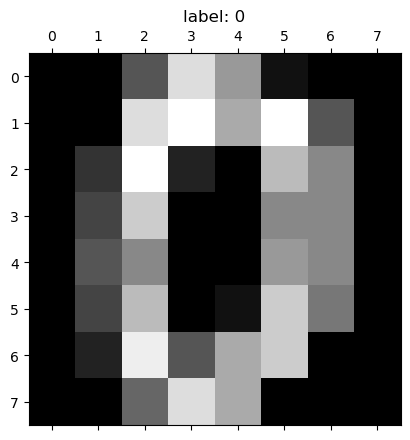

In [3]:
import matplotlib.pyplot as plt

index = 0
plt.gray()
plt.matshow(X[index].reshape(8, 8))      # matshow() is used to visualize a digit as an 8x8 image
plt.title(f'label: {y[index]}')
plt.show()

Feature Preprocessing: t-SNE

In [17]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)

Feature Scaling

X_embedded shape: (1797, 2)


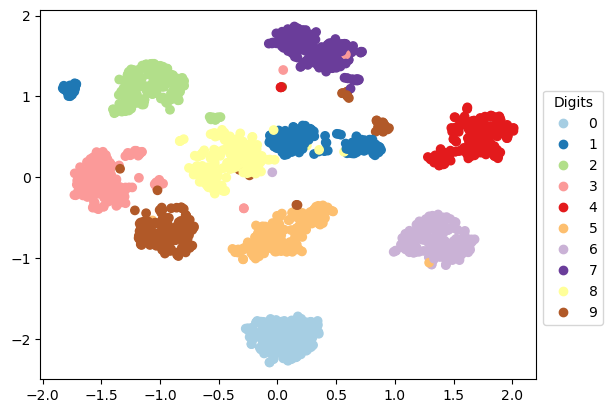

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_embedded = scaler.fit_transform(X_embedded)
print("X_embedded shape:", X_embedded.shape)

# Visualize scaling result
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1, 0.8))
plt.show()


Function to Plot Decision Boundaries

In [30]:
# Function 1: make_meshgrid
# This function creates a 2D grid to be used as the background for plotting decision regions.

import numpy as np

def make_meshgrid(x, y, h=.02):
    """Create a mesh grid of points
    Parameters:
    - x, y: 1D arrays of input features
    - h: step size for the grid

    Returns:
    - xx, yy: 2D mesh grid arrays
    """

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Function 2: plot_contours
# This function plots the classifier's decision boundaries using the previously created meshgrid.

def plot_contours(ax, clf, xx, yy, **params):
    """
    Plot decision boundaries of a classifier over a mesh grid.

    Parameters:
    - ax: Matplotlib Axes object
    - clf: Trained classifier
    - xx, yy: Mesh grid arrays
    - **params: Additional plotting parameters
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.imshow(Z, interpolation='nearest',
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              aspect='auto', origin='lower', **params)



#### 1. Linear SVC: Model Training & Visualization

- `C`: regularization parameter (controls model complexity)
- `max_iter=1000`: maximum number of iterations

In [39]:
from sklearn import svm

# Build LinearSVC model
linear_svc_model = svm.LinearSVC(C=1, max_iter=1000)

# Train model on reduced feature data
linear_svc_model.fit(X_embedded, y)


LinearSVC(C=1)

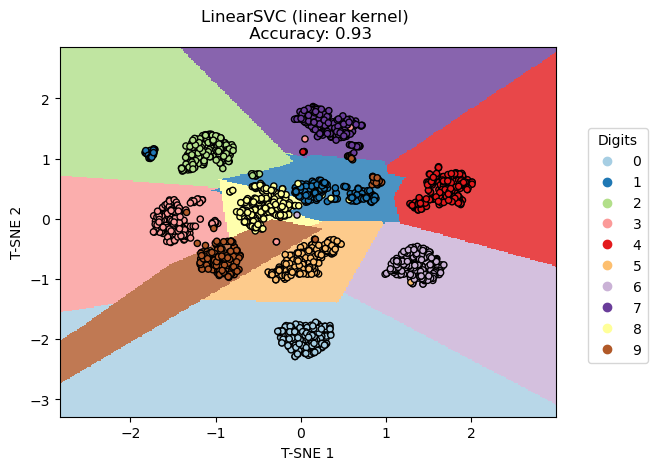

In [42]:
# Extract X and Y coordinates from t-SNE
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]

# Create grid for decision surface
xx, yy = make_meshgrid(X0, X1)

# Plot decision boundaries
plot_contours(plt, linear_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.8)

# Plot data points
plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')

# Compute accuracy
accuracy = linear_svc_model.score(X_embedded, y)

# Display accuracy on title
plt.title(f'LinearSVC (linear kernel) \n Accuracy: {accuracy:.2f}')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.2, 0.8))
plt.show()

> - The trained model achieved 82% accuracy on training data.
> - It struggles to clearly separate digit 3 and 9 — a common confusion due to their visual similarity.

From the decision boundary results shown in the figure above, we can observe that linear classifiers cannot perfectly separate all categories. Overall, the model achieved an accuracy of 82% on the training data.

It is worth noting that the classification performance for digit 9 is relatively poor, as it is often confused with digit 3.

#### 2. SVC Linear Kernel

- `C=1`: Regularization strength --- lower means stronger regularization
- `kernel='linear'`: Uses linear kernel to find decision boundaries |

In [41]:
from sklearn import svm

# Build linear kernel SVC model
linear_svc_model = svm.SVC(kernel='linear', C=1)

# Fit model
linear_svc_model.fit(X_embedded, y)


SVC(C=1, kernel='linear')

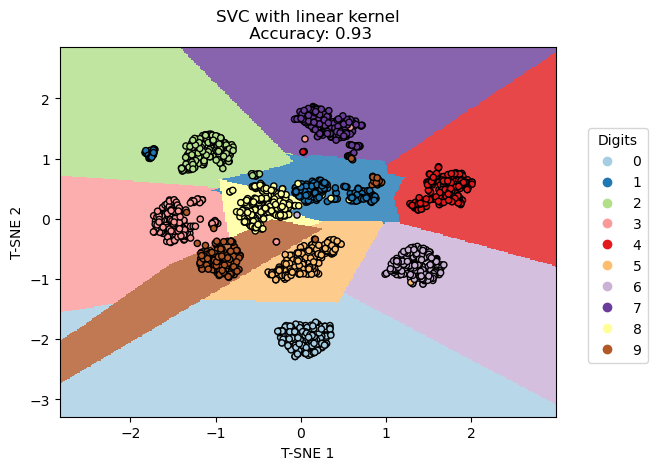

In [43]:
# Get coordinate points
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]

# Create grid for decision surface
xx, yy = make_meshgrid(X0, X1)

# Plot decision boundaries
plot_contours(plt, linear_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.8)

# Plot scatter points
plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')

# Calculate accuracy
accuracy = linear_svc_model.score(X_embedded, y)
plt.title(f'SVC with linear kernel\n Accuracy: {accuracy:.2f}')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.2, 0.8))
plt.show()

> The SVC model with linear kernel provides higher accuracy than LinearSVC in this example (93% vs. 82%). Though both are linear models, SVC uses libsvm, which can sometimes yield better results on smaller datasets due to its handling of margin calculations.

From the decision boundary results above, we can observe that although both models use linear methods for classification, the `svm.SVC()` model with a **linear kernel** achieved **93% accuracy** on the training data.

Next, we explain the difference between **`LinearSVC`** and **`SVC(kernel='linear')`**:
-   Under default settings, **`LinearSVC` minimizes the squared hinge loss**, while **`SVC` minimizes the hinge loss**.
-   `LinearSVC` is based on **`liblinear`**, which uses an optimization approach suitable for large datasets.
-   `SVC` is based on **`libsvm`**, which uses a one-vs-one strategy and is more suitable for small to medium-sized datasets with high accuracy.

Because `liblinear` is more efficient for large data but may result in slightly lower accuracy, and `libsvm` optimizes accuracy but at a higher computational cost, we typically:
-   Choose **`LinearSVC` for large-scale problems**
-   Choose **`SVC` when accuracy is a priority**

Additionally, **`LinearSVC` uses a one-vs-rest strategy** for multi-class classification, while **`SVC` uses a one-vs-one strategy**, which can generate more classifiers.

#### 3. SVC Polynomial Kernel

In [73]:
from sklearn import svm

# Build model with polynomial kernel
poly_svc_model = svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)   # degree = 3 is default

# Fit the model on data
poly_svc_model.fit(X_embedded, y)


SVC(C=1, gamma='auto', kernel='poly')

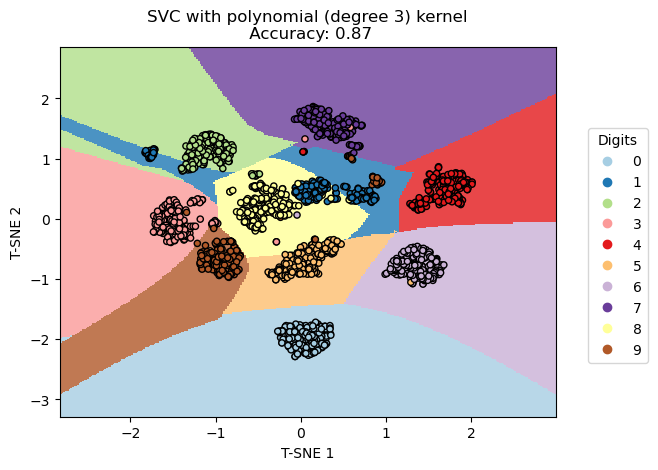

In [74]:
# Get x, y coordinate features
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]

# Create mesh grid for decision boundaries
xx, yy = make_meshgrid(X0, X1)

# Draw decision boundaries
plot_contours(plt, poly_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.8)

# Draw scatter plot
plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')

# Accuracy calculation
accuracy = poly_svc_model.score(X_embedded, y)
plt.title(f'SVC with polynomial (degree 3) kernel\n Accuracy: {accuracy:.2f}')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.2, 0.8))
plt.show()


> - In this example, degree=3, mapping features into a 3D polynomial space.
> - The accuracy reached 87%, showing improved performance over linear methods in this dataset.
> - However, higher degrees can lead to overfitting, so it's important to tune and validate.
> - Accuracy: 0.87, slightly lower than the previous SVC with linear kernel (0.93), but still respectable—suggesting polynomial transformation handles complex boundaries better than linear in some cases.

In this example, we set the degree parameter of the Polynomial kernel to 3. This means the data is being transformed into a third-order polynomial space for classification.

It’s important to note that the higher the degree, the more complex the model becomes, which may lead to overfitting. In the decision boundary results shown below, we observe that using the non-linear transformation of the Polynomial kernel achieved 87% accuracy in this case. We can experiment with increasing or decreasing the degree value to explore its effect on performance and make appropriate adjustments.

The degree parameter is a way to adjust the complexity of the Polynomial kernel model. Care must be taken to find a suitable degree value that balances the model’s ability to fit the data and its generalization performance.

#### 4. SVC Sigmoid Kernel

In [65]:
from sklearn import svm

# Create a model using the sigmoid kernel
sigmoid_svc_model = svm.SVC(kernel='sigmoid', gamma=0.5, C=1)

# Train the model
sigmoid_svc_model.fit(X_embedded, y)

SVC(C=1, gamma=0.5, kernel='sigmoid')

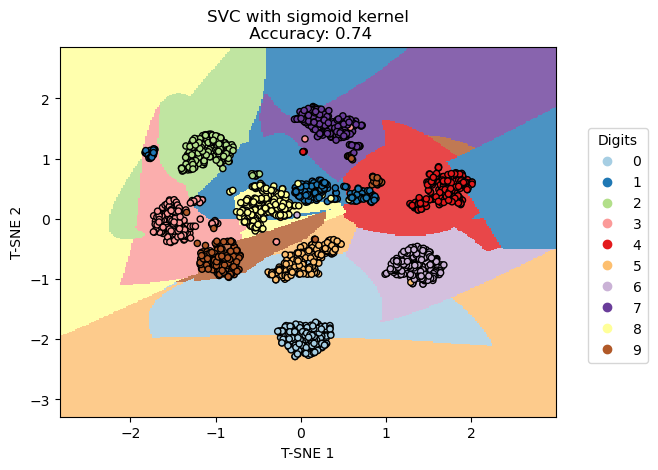

In [67]:
# Extract coordinates
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]

# Create meshgrid
xx, yy = make_meshgrid(X0, X1)

# Plot decision boundary
plot_contours(plt, sigmoid_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')

# Model accuracy
accuracy = sigmoid_svc_model.score(X_embedded, y)
plt.title(f'SVC with sigmoid kernel\n Accuracy: {accuracy:.2f}')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.2, 0.8))
plt.show()


> Accuracy: 74%
> - Reasons for lower performance:
>    - The Sigmoid kernel’s S-shape output (between 0 and 1) may distort relationships between points.
>    - Sensitive to noise and outliers, especially if the data isn't well-separated in the projected feature space.
>    - Difficult to capture complex nonlinear patterns with default hyperparameters.
> - Sigmoid kernel isn't always the best choice unless you have strong domain knowledge or the problem suits its shape.
> - Consider adjusting C and gamma further to improve results.
> - Kernel selection and parameter tuning is an iterative process requiring evaluation and refinement to reach optimal performance.

By observing the SVM model built using the Sigmoid kernel, we found that under the current parameter settings, the model only achieved an accuracy of 74%. The characteristics of the Sigmoid kernel may have negatively affected the model’s performance.

Because of the S-shaped curve of the Sigmoid function, its output values are between 0 and 1, which may cause difficulties in separating non-linear data in some regions. In addition, problems such as gradient vanishing and improper parameter settings can also affect the model's ability to learn and produce good results.

In practical scenarios, we often need to tune hyperparameters, such as C and gamma, to find the most suitable kernel function and settings for a given problem. Further adjustments, like replacing the kernel or switching to other models, may be necessary to improve the model’s performance.

Therefore, hyperparameter tuning is a continuously iterative process that requires careful selection and testing to find the optimal configuration.

#### 5. SVC RBF kernel

In [75]:
from sklearn import svm

# Create a model with kernel='rbf'
rbf_svc_model = svm.SVC(kernel='rbf', gamma=0.5, C=1)

# Train the model using training data
rbf_svc_model.fit(X_embedded, y)


SVC(C=1, gamma=0.5)

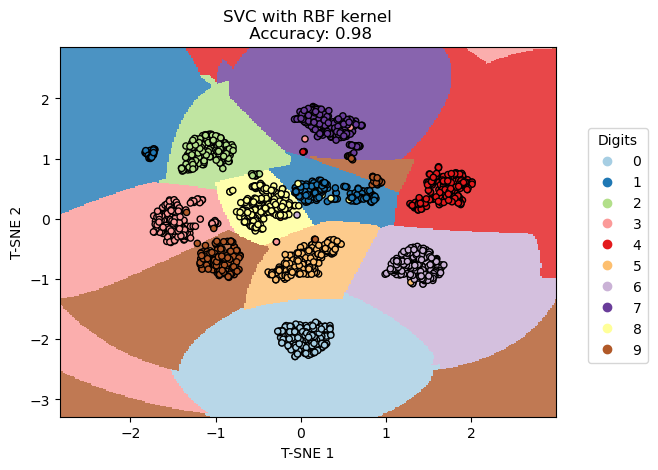

In [78]:
# Extract coordinates
X0, X1 = X_embedded[:, 0], X_embedded[:, 1]

# Create meshgrid
xx, yy = make_meshgrid(X0, X1)

# Plot decision boundary
plot_contours(plt, rbf_svc_model, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')

# Model accuracy
accuracy = rbf_svc_model.score(X_embedded, y)
plt.title(f'SVC with RBF kernel\n Accuracy: {accuracy:.2f}')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.2, 0.8))
plt.show()


> - Accuracy = 98%, the highest among all kernels so far.
> - Excellent at separating complex data clusters, including closely spaced digits like 1 and 9.
> - Shows strong non-linear classification power and flexibility.
> - Warns of overfitting risk if not tuned properly—especially with noisy or ambiguous clusters.

From the visualization results of the decision boundary, it can be observed that the RBF Kernel achieved good classification performance with properly set parameters, reaching a training accuracy of 98%.

A particularly noteworthy detail is that the data points for digits 1 and 9 were effectively separated by the nonlinear transformation of the RBF Kernel, dividing them into two distinct regions. This indicates that the RBF Kernel possesses strong nonlinear transformation capabilities, allowing the model to be highly flexible and effectively separate complex clusters.

However, in real-world applications, the existence of noisy data or outliers can lead to overfitting. Therefore, proper data preprocessing is a very important step in machine learning tasks.

### SVR (Support Vector Regression) 
Practical Application: Salary Prediction

Dataset Description

This dataset is a synthetic numerical dataset that includes **"Years of Experience"** (`YearsExperience`) and **"Salary"** (`Salary`).\
It contains a total of 100 records, with each record representing an employee's years of experience and corresponding salary level.

**Input Feature:**
-   `YearsExperience` (Years of Experience)

**Output:**
-   `Salary` (Salary)

Load dataset

In [85]:
import pandas as pd

df_data = pd.read_csv('../datasets/Salary_Data.csv')

# Input feature
X = df_data[['YearsExperience']].values

# Output label
y = df_data['Salary'].values


Visualize the data

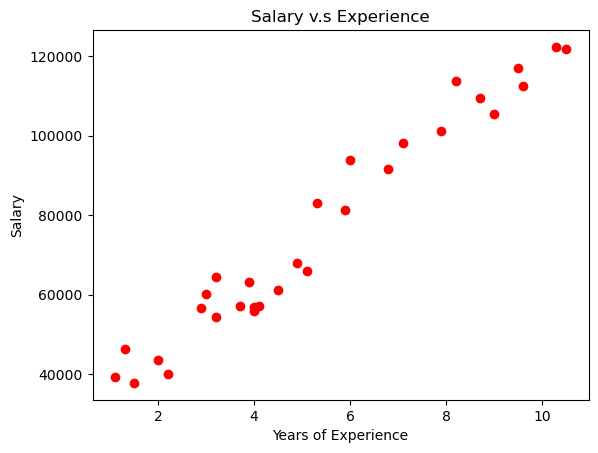

In [89]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='red')
plt.title("Salary v.s Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


- The scatter plot reveals a positive linear relationship between years of experience and salary.

- This observation supports using a linear regression model.

- Since the pattern is linear, models like SVR with linear kernel can effectively capture this trend and provide good predictive results.

By observing the scatter plot, we see a clear positive correlation between salary and years of experience. This trend suggests a linear relationship, and such visualization provides us with an initial insight and serves as a foundation for future model building—helping us better understand the growth and correlation between variables.

From the analysis results, we can basically fit a simple linear regression model to predict salary, and it gives a reasonably good result. This is because the data indeed shows a strong linear trend, and a simple linear model can capture this relationship effectively.

Therefore, it is reasonable to try other regression models as well—such as SVR (Support Vector Regression) with a linear kernel—which may also yield good predictions in this case.

Split the dataset into training and testing sets

To ensure proper evaluation of model performance, the dataset must be split into:

-   **Training set**: for training the model

-   **Testing set**: for evaluating the model

In [90]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shape of training set X:', X_train.shape)
print('Shape of testing set X:', X_test.shape)


Shape of training set X: (21, 1)
Shape of testing set X: (9, 1)


Use Grid Search to Find Optimal SVR Hyperparameters

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import pandas as pd

# Define the parameter grid
param_grid = {
    'C': [1, 10, 50, 100, 400, 800],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Create the SVR model
svr_model = SVR()

# Perform grid search using GridSearchCV
svr_search = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid,
    cv=5,
    refit=True,
    return_train_score=False
)

# Fit the grid search to the training data
svr_search.fit(X_train, y_train)

# Extract the best score and best parameter combination
best_score = svr_search.best_score_
best_params = svr_search.best_params_

# Create dataframe for Grid Search result
df_score = pd.DataFrame([{
    'model': 'SVR',
    'best_score': best_score,
    'best_params': best_params
}], columns=['model', 'best_score', 'best_params'])

print(df_score)



  model  best_score                     best_params
0   SVR     0.83528  {'C': 800, 'kernel': 'linear'}


Through the above parameter search method, we successfully found the optimal SVR model configuration.\
Now we can use these parameters to build our best-performing model using svm.SVR() from scikit-learn.

First, we create a new SVR model, specifying the best hyperparameters:\
`C = 800` and `kernel = 'linear'`,
then train the model using the training dataset.

Final SVR Model Training

After identifying the best hyperparameters (C=800, kernel='linear') via GridSearchCV, we now retrain the final model using the training data:

In [93]:
from sklearn import svm

# Create SVR model with best parameters
linear_model = svm.SVR(C=800, kernel='linear')

# Train the model
linear_model.fit(X_train, y_train)


SVR(C=800, kernel='linear')

Model Evaluation

To evaluate the performance of the final SVR model on both training and test sets, two common metrics are used:
- R² Score (coefficient of determination): Measures how well the model explains variance in the data.
- MSE (Mean Squared Error): Measures the average squared difference between actual and predicted values.

In [94]:
from sklearn.metrics import mean_squared_error

# Evaluation on training set
y_train_pred = linear_model.predict(X_train)
print("R2 Score:", linear_model.score(X_train, y_train))
print("MSE:", mean_squared_error(y_train, y_train_pred))

# Evaluation on test set
y_test_pred = linear_model.predict(X_test)
print("R2 Score:", linear_model.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, y_test_pred))

R2 Score: 0.9549038632308892
MSE: 30654804.827852063
R2 Score: 0.936305633328982
MSE: 41102157.67854828


R² Score and Mean Squared Error (MSE) help evaluate the model’s generalization ability—that is, how well the model performs on unseen data.
- The R² Score ranges from 0 to 1 and represents how well the model explains the variance in the target variable. A score closer to 1 indicates better explanatory power.
- MSE measures the average squared difference between predicted and actual values. A lower MSE means better prediction accuracy.

From the results, we can see that the model performs well on both the training and test sets, achieving good predictive performance. This demonstrates that the SVR model excels in explaining the data's variability.

Visualizing Predictions: Regression Analysis

In [95]:
def plot_salary_experience(X, y, y_pred, title='Salary vs Experience'):
    """
    Plot actual vs predicted salary based on years of experience.

    Parameters
    ----------
    X : ndarray
        Feature values (Years of Experience)
    y : ndarray
        Actual Salary values
    y_pred : ndarray
        Predicted Salary values
    """
    plt.scatter(X, y, color='red', label='Actual')
    plt.plot(X, y_pred, color='blue', label='Predicted')
    plt.title(title)
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()


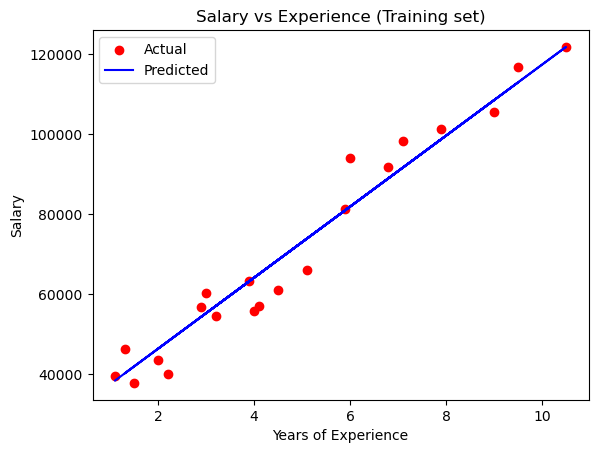

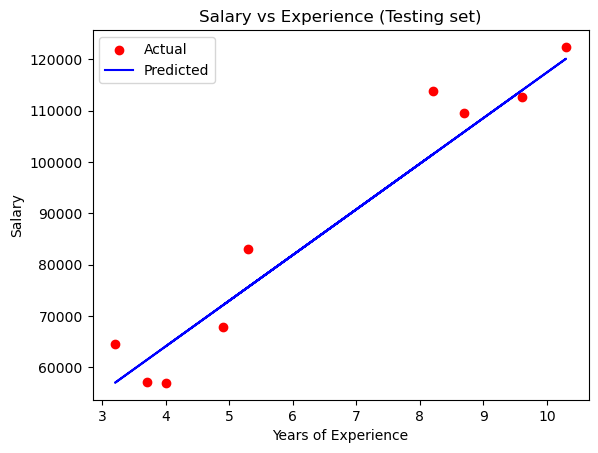

In [97]:
# Visualize Training Set
plot_salary_experience(X_train, y_train, y_train_pred, 'Salary vs Experience (Training set)')

# Visualize Testing Set
plot_salary_experience(X_test, y_test, y_test_pred, 'Salary vs Experience (Testing set)')
